# Predicting the Sale Price of Bulldozers Using Machine Learning
In this notebook, we're going to go through an example machine learning project with goal of predicting the sale price of bulldozers.

## 1. Problem definition
How well can we predict the future scale price of bulldozer, given its charcteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data
The data is downloaded form the Kaggle Bulebook for Bulldozers competition:https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

There are three main datasets:

Train.csv is the training set, which contains data through the end of 2011.
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
##3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check:https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

Note: The goal most regression evaluation metrics is to minimize error. For example our goal for this project will be to build a machine learning model which minimizes RMSLE.

## 4.Features
Kaggle provides a data dictionary detalling all the features of the dataset.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("TrainAndValid.csv", low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['SalePrice'].value_counts()

25000.0    7892
20000.0    7678
15000.0    7568
26000.0    7176
16000.0    7147
           ... 
10730.0       1
5150.0        1
8570.0        1
10867.0       1
40100.0       1
Name: SalePrice, Length: 954, dtype: int64

In [12]:
df = pd.read_csv("TrainAndValid.csv",
                low_memory=False,
                parse_dates=['saledate'])

In [13]:
df.sort_values(by=['saledate'],
              inplace=True,
              ascending=True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [103]:
# copying the dataset
df_tmp = df.copy()

In [15]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [16]:
df_tmp.drop('saledate',axis=1, inplace=True)

In [17]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [18]:
df_tmp['SalePrice'].value_counts()

25000.0    7892
20000.0    7678
15000.0    7568
26000.0    7176
16000.0    7147
           ... 
13875.0       1
10225.0       1
8675.0        1
61750.0       1
56600.0       1
Name: SalePrice, Length: 954, dtype: int64

In [19]:
x = df_tmp.drop("SalePrice", axis = 1)
y= df_tmp["SalePrice"]

In [12]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x,y)

ValueError: could not convert string to float: 'Low'

In [20]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [21]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convert string to categories

One Way we can trun all our data into numbers is by converting them into pandas categories.

We can check the different datatypes compatible with pandas here:https://pandas.pydata.org/pandas-docs/version/1.4/reference/general_utility_functions.html

In [ ]:
df_tmp.head(20).T

In [ ]:
df_tmp[:1]

In [ ]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

In [22]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [23]:
# If you're wondering what df.items() does, here's an example
random_dict= {"key1":"hello",
             "key2":"world!"}

for key, value in random_dict.items():
    print(f"key:{key}")
    print(f"value:{value}")

key:key1
value:hello
key:key2
value:world!


In [24]:
# This will turn all of the string value into category vlaues
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [25]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [26]:
df_tmp.Differential_Type.cat.categories

Index(['Limited Slip', 'Locking', 'No Spin', 'Standard'], dtype='object')

In [27]:
df_tmp.Differential_Type.cat.codes[:10]

205615   -1
274835    3
141296   -1
212552    3
62755    -1
54653    -1
81383     3
204924    3
135376   -1
113390   -1
dtype: int8

In [28]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [29]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks ot pandas categories we now have a way to access all of our 
data in the form of numbers.

But we still have bunch of missing date....

In [ ]:
# Check missing data
df_tmp.isnull().sum()/len(df_tmp)

### Save preprocessed data

In [30]:
# export current tmp dataframe
df_tmp.to_csv("train_tmp.csv",
             index=False)

In [14]:
# Import preprocessed data
df_tmp = pd.read_csv("train_tmp",
                    low_memory=False)
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfYear,saleDayOfWeek
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,17,1
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,31,1
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,31,1
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,31,1
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,31,1


In [15]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill missing values

### Fill numerical missing values first

In [31]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)
    

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfYear
saleDayOfWeek


In [32]:
# Check for which numeric columns have null values
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [33]:
# Fill numeric rows with the median
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data has missing values
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [34]:
# Demostrate how median is more robust(to outliers) than mean
hunderds = np.full((1000),100)
hunderds_billion = np.append(hunderds, 1000000000)
np.mean(hunderds), np.mean(hunderds_billion), np.median(hunderds), np.median(hunderds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [35]:
# Check if there's any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [36]:
# Check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [22]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variables into numbers


In [37]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [24]:
pd.Categorical(df_tmp["state"])

['Texas', 'Florida', 'Florida', 'Florida', 'Florida', ..., 'California', 'California', 'California', 'California', 'California']
Length: 412698
Categories (53, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming']

In [38]:
# Turn categorical varibles into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indiate wheteher sample had missing values
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categorical(some values) into positive by adding +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [27]:
# We can see only positive values
pd.Categorical(df_tmp["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [28]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [29]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [30]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Now that all the data is numeric as well as dataframe has
no missing values, we should able to build a machine learning model.


In [31]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [32]:
len(df_tmp)

412698

In [90]:
%%time
# Instantiate model 
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# Fit the model
model.fit(df_tmp.drop("SalePrice",axis=1), df_tmp["SalePrice"])

CPU times: total: 37min 11s
Wall time: 5min 21s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [91]:
# Score the model
model.score(df_tmp.drop("SalePrice",axis=1), df_tmp["SalePrice"])

0.9875535765185894

**Question**:Why doesn't the score metric hold water?(
    Why isn't the metric reliable)

### Spliting data into train/validation sets

In [39]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [40]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [40]:
# split data into trianing and validation 
df_train = df_tmp[df_tmp.saleYear !=2012]
df_val = df_tmp[df_tmp.saleYear ==2012]

len(df_train), len(df_val)

(401125, 11573)

In [41]:
# split data into x and y
x_train,y_train = df_train.drop("SalePrice",axis=1),df_train["SalePrice"]
x_valid,y_valid = df_val.drop('SalePrice', axis=1),df_val["SalePrice"]

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [51]:
x_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

In [52]:
for col in x_train.columns:
    print(col)

SalesID
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
saleYear
saleMonth
saleDay
saleDayOfYear
saleDayOfWeek
auctioneerID_is_missing
MachineHoursCurrentMeter_is_missing
UsageBand_is_missing
fiModelDesc_is_missing
fiBaseModel_is_missing
fiSecondaryDesc_is_missing
fiModelSeries_is_missing
fiModelDescriptor_is_missing
ProductSize_is_missing
fiProductClassDesc_is_missing
state_is_missing
ProductGroup_

In [62]:
new_columns = ['SalesID',
'MachineID',
'ModelID',
'datasource',
'auctioneerID',
'YearMade',
'MachineHoursCurrentMeter',
'UsageBand',
'fiModelDesc',
'fiBaseModel',
'fiSecondaryDesc',
'fiModelSeries',
'fiModelDescriptor',
'ProductSize',
'fiProductClassDesc',
'state',
'ProductGroup',
'ProductGroupDesc',
'Drive_System',
'Enclosure',
'Forks',
'Pad_Type',
'Ride_Control',
'Stick',
'Transmission',
'Turbocharged',
'Blade_Extension',
'Blade_Width',
'Enclosure_Type',
'Engine_Horsepower',
'Hydraulics',
'Pushblock',
'Ripper',
'Scarifier',
'Tip_Control',
'Tire_Size',
'Coupler',
'Coupler_System',
'Grouser_Tracks',
'Hydraulics_Flow',
'Track_Type',
'Undercarriage_Pad_Width',
'Stick_Length',
'Thumb',
'Pattern_Changer',
'Grouser_Type',
'Backhoe_Mounting',
'Blade_Type',
'Travel_Controls',
'Differential_Type',
'Steering_Controls',
'saleYear',
'saleMonth',
'saleDay',
'saleDayOfYear',
'saleDayOfWeek',
'MachineHoursCurrentMeter_is_missing',
'UsageBand_is_missing',
'fiModelDesc_is_missing',
'fiBaseModel_is_missing',
'fiSecondaryDesc_is_missing',
'fiModelSeries_is_missing',
'fiModelDescriptor_is_missing',
'ProductSize_is_missing',
'fiProductClassDesc_is_missing',
'state_is_missing',
'ProductGroup_is_missing',
'ProductGroupDesc_is_missing',
'Drive_System_is_missing',
'Enclosure_is_missing',
'Forks_is_missing',
'Pad_Type_is_missing',
'Ride_Control_is_missing',
'Stick_is_missing',
'Transmission_is_missing',
'Turbocharged_is_missing',
'Blade_Extension_is_missing',
'Blade_Width_is_missing',
'Enclosure_Type_is_missing',
'Engine_Horsepower_is_missing',
'Hydraulics_is_missing',
'Pushblock_is_missing',
'Ripper_is_missing',
'Scarifier_is_missing',
'Tip_Control_is_missing',
'Tire_Size_is_missing',
'Coupler_is_missing',
'Coupler_System_is_missing',
'Grouser_Tracks_is_missing',
'Hydraulics_Flow_is_missing',
'Track_Type_is_missing',
'Undercarriage_Pad_Width_is_missing',
'Stick_Length_is_missing',
'Thumb_is_missing',
'Pattern_Changer_is_missing',
'Grouser_Type_is_missing',
'Backhoe_Mounting_is_missing',
'Blade_Type_is_missing',
'Travel_Controls_is_missing',
'Differential_Type_is_missing',
'Steering_Controls_is_missing',
'auctioneerID_is_missing']

In [64]:
x_train = x_train[new_columns]
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,False,False,False,True,True,False
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,False,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,False,False,False,True,True,False
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,False,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,False,False,False,True,True,False


In [42]:
df1 = pd.read_csv('Valid.csv',low_memory=False)
df1.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter     6834
UsageBand                    7542
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3536
fiModelSeries                9814
fiModelDescriptor            8676
ProductSize                  5830
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 8847
Enclosure                       9
Forks                        5935
Pad_Type                     9611
Ride_Control                 7451
Stick                        9611
Transmission                 6796
Turbocharged                 9611
Blade_Extension             10809
Blade_Width                 10809
Enclosure_Type


### Building an evaluation function


In [43]:
# create evaluation function (the competition uses RMSLE).
from sklearn.metrics import mean_squared_log_error , mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Create function a evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training MAE":mean_absolute_error(y_train,train_preds),
             "Valid MAE" : mean_absolute_error(y_valid,val_preds),
             "Training RMSLE": rmsle(y_train,train_preds),
             "Valid RMSLE" : rmsle(y_valid,val_preds),
             "Training R^2": r2_score(y_train,train_preds),
             "Valid R^2": r2_score(y_valid,val_preds)}
    return scores

### Testing our model on a subset (to tune the hyperparametrs)

In [109]:
# This takes far too long .. for experimenting
# %%time
# model=RandomForestRegressor(n_jobs=-1,
#                            random_state=42)

# model.fit(x_trian,y_train)

In [103]:
len(x_train)

401125

In [38]:
# change max sample values
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=1000)


In [39]:
%%time
# cutting down on the max number of samples eac estimator can see improve in time
model.fit(x_train,y_train)

CPU times: total: 7.16 s
Wall time: 3.15 s


RandomForestRegressor(max_samples=1000, n_jobs=-1, random_state=42)

### Hyperparameter tuning with RandomizedSearchCV

In [41]:
%%time
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestRegressor()
# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators":np.arange(10,100,10),
          "max_depth":[None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features":[0.5,1,'sqrt','auto'],
          "max_samples":[10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(estimator=model,
                             param_distributions=rf_grid,
                             n_iter=2,
                             cv=5,
                             verbose=True)
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\jayan\anaconda3\envs\bulldozerpriceprediction\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\jayan\anaconda3\envs\bulldozerpriceprediction\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\jayan\anaconda3\envs\bulldozerpriceprediction\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `ma

CPU times: total: 36.1 s
Wall time: 36.7 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [42]:
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 10,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

In [46]:
show_scores(rs_model)


{'Training MAE': 6652.174318307359,
 'Valid MAE': 8164.725801846294,
 'Training RMSLE': 0.29818617282276527,
 'Valid RMSLE': 0.3261172908480261,
 'Training R^2': 0.8064065371542433,
 'Valid R^2': 0.7781111269040257}

### Train the model with the best hyperparameters

**Note**: These were found after 100 iterations of `randomized Search CV`


In [65]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None)

# Fit the ideal model
ideal_model.fit(x_train,y_train)

CPU times: total: 6min 42s
Wall time: 57.9 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [48]:
show_scores(ideal_model)

{'Training MAE': 2946.7665814312695,
 'Valid MAE': 5942.342787193315,
 'Training RMSLE': 0.14427104098229993,
 'Valid RMSLE': 0.2460389823150939,
 'Training R^2': 0.9590826788577563,
 'Valid R^2': 0.8815396424419376}

### Make predictions on test data

In [6]:
# Import the test data
df_test = pd.read_csv("Test.csv",low_memory=False,
                     parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [67]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

### Preprocessing the data(getting the test dataset in the same format as our training dataset)

In [7]:
def preprocess_data(df):
    """
    perform transformations on df and returns transformed df.
    """
    df['saleYear'] =df.saledate.dt.year
    df['saleMonth']= df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfYear'] = df.saledate.dt.dayofyear
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
     
    df.drop('saledate',axis =1,inplace=True)
    
    # Fill the numeric rows with median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data has missing values
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
            # filled categorical missing data and turn categories into numerical
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"]=pd.isnull(content)
            # WE add +1 to the category code because pandas missing give -ve value(-1)
            df[label] = pd.Categorical(content).codes+1
    return df
    

In [8]:
df_test= preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [72]:
# lets us see which columns is missing in our x_test
set(x_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [71]:
# Manually adjust df_test to have auctioneerID_is_ missing column
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally now our test dataframe has the same features as our training dataframe, we can predict the predictions


In [66]:
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,False,False,False,True,True,False
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,False,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,False,False,False,True,True,False
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,False,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,False,False,False,True,True,False


In [101]:
test_preds = ideal_model.predict(df_test)

In [47]:
import pickle

In [49]:
import pickle
# open a file, where you want to store the data
file = open("random_foest_regression_model.pkl",'wb')

# dump information to that file
pickle.dump(ideal_model,file)

In [69]:
for col in df_test.columns:
    print(col)

SalesID
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
saleYear
saleMonth
saleDay
saleDayOfYear
saleDayOfWeek
MachineHoursCurrentMeter_is_missing
UsageBand_is_missing
fiModelDesc_is_missing
fiBaseModel_is_missing
fiSecondaryDesc_is_missing
fiModelSeries_is_missing
fiModelDescriptor_is_missing
ProductSize_is_missing
fiProductClassDesc_is_missing
state_is_missing
ProductGroup_is_missing
ProductGroupD

In [72]:
set(x_train.columns)-set(df_test.columns)

set()

In [74]:
new_columns1= ['SalesID',
'MachineID',
'ModelID',
'datasource',
'auctioneerID',
'YearMade',
'MachineHoursCurrentMeter',
'UsageBand',
'fiModelDesc',
'fiBaseModel',
'fiSecondaryDesc',
'fiModelSeries',
'fiModelDescriptor',
'ProductSize',
'fiProductClassDesc',
'state',
'ProductGroup',
'ProductGroupDesc',
'Drive_System',
'Enclosure',
'Forks',
'Pad_Type',
'Ride_Control',
'Stick',
'Transmission',
'Turbocharged',
'Blade_Extension',
'Blade_Width',
'Enclosure_Type',
'Engine_Horsepower',
'Hydraulics',
'Pushblock',
'Ripper',
'Scarifier',
'Tip_Control',
'Tire_Size',
'Coupler',
'Coupler_System',
'Grouser_Tracks',
'Hydraulics_Flow',
'Track_Type',
'Undercarriage_Pad_Width',
'Stick_Length',
'Thumb',
'Pattern_Changer',
'Grouser_Type',
'Backhoe_Mounting',
'Blade_Type',
'Travel_Controls',
'Differential_Type',
'Steering_Controls',
'saleYear',
'saleMonth',
'saleDay',
'saleDayOfYear',
'saleDayOfWeek',
'MachineHoursCurrentMeter_is_missing',
'UsageBand_is_missing',
'fiModelDesc_is_missing',
'fiBaseModel_is_missing',
'fiSecondaryDesc_is_missing',
'fiModelSeries_is_missing',
'fiModelDescriptor_is_missing',
'ProductSize_is_missing',
'fiProductClassDesc_is_missing',
'state_is_missing',
'ProductGroup_is_missing',
'ProductGroupDesc_is_missing',
'Drive_System_is_missing',
'Enclosure_is_missing',
'Forks_is_missing',
'Pad_Type_is_missing',
'Ride_Control_is_missing',
'Stick_is_missing',
'Transmission_is_missing',
'Turbocharged_is_missing',
'Blade_Extension_is_missing',
'Blade_Width_is_missing',
'Enclosure_Type_is_missing',
'Engine_Horsepower_is_missing',
'Hydraulics_is_missing',
'Pushblock_is_missing',
'Ripper_is_missing',
'Scarifier_is_missing',
'Tip_Control_is_missing',
'Tire_Size_is_missing',
'Coupler_is_missing',
'Coupler_System_is_missing',
'Grouser_Tracks_is_missing',
'Hydraulics_Flow_is_missing',
'Track_Type_is_missing',
'Undercarriage_Pad_Width_is_missing',
'Stick_Length_is_missing',
'Thumb_is_missing',
'Pattern_Changer_is_missing',
'Grouser_Type_is_missing',
'Backhoe_Mounting_is_missing',
'Blade_Type_is_missing',
'Travel_Controls_is_missing',
'Differential_Type_is_missing',
'Steering_Controls_is_missing',
'auctioneerID_is_missing']

In [75]:
df_test = df_test[new_columns1]
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [76]:
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,False,False,False,True,True,False
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,False,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,False,False,False,True,True,False
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,False,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,False,False,False,True,True,False


In [77]:
test_preds = ideal_model.predict(df_test)

In [78]:
test_preds

array([17250.31584098, 15980.64638423, 52616.0778715 , ...,
       12908.29284063, 16842.66435222, 26964.89844528])

In [80]:
# Format predictions into the same format kaggle is asked'
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17250.315841
1,1227844,15980.646384
2,1227847,52616.077872
3,1227848,62564.144675
4,1227863,53537.357097
...,...,...
12452,6643171,45101.499437
12453,6643173,13069.785975
12454,6643184,12908.292841
12455,6643186,16842.664352


In [81]:
# Export prediction data
df_preds.to_csv('test_predictions.csv',index=False)

### Feature IMportance

* Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the targe variable.

In [86]:
# Find the feature importance of our best model
ideal_model.feature_importances_

array([3.29326641e-02, 2.27835962e-02, 4.15941767e-02, 1.65732734e-03,
       3.37596407e-03, 2.04369651e-01, 3.22716994e-03, 9.40370716e-04,
       4.60297558e-02, 4.26070125e-02, 6.32947954e-02, 4.91107792e-03,
       1.62491198e-02, 1.59078174e-01, 3.96114563e-02, 5.90471510e-03,
       2.94476083e-03, 1.67988695e-03, 3.98665106e-03, 6.48217646e-02,
       4.86386874e-04, 7.93386730e-05, 1.37357710e-03, 1.82932668e-04,
       8.82894854e-04, 4.35857233e-04, 1.18715429e-04, 1.21417532e-02,
       2.59902312e-03, 2.41629010e-03, 3.20177584e-03, 7.82214081e-03,
       2.35864805e-03, 1.25646079e-03, 3.45730411e-04, 5.85153338e-03,
       7.67428325e-04, 8.37483241e-03, 3.54309761e-03, 3.11584515e-03,
       7.05939208e-04, 9.65603807e-04, 2.57882584e-03, 5.61091454e-04,
       5.40439420e-04, 3.43607743e-04, 7.28128172e-04, 2.05114012e-03,
       7.40754025e-04, 2.82059797e-04, 1.68314514e-04, 7.25755600e-02,
       3.75202082e-03, 5.72453711e-03, 9.84369935e-03, 2.87776450e-03,
      

In [85]:
x_train


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,False,False,False,True,True,False
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,False,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,False,False,False,True,True,False
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,False,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393098,6260687,1074871,4331,149,2.0,1000,0.0,0,3137,1055,...,True,True,True,True,True,True,True,False,False,False
400217,6312170,1812622,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,False
400302,6312727,1811599,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,False
400393,6315051,1858173,17432,149,2.0,2004,0.0,0,3389,1175,...,True,True,True,True,True,True,True,True,True,False


In [99]:
# Helper function for plotting importance
def plot_features(columns , importances ,n =20):
    df = (pd.DataFrame({'features':columns,
                       "feature_importances":importances})
         .sort_values("feature_importances",ascending = False)
         .reset_index(drop=True))
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature_importances')
    ax.invert_yaxis()

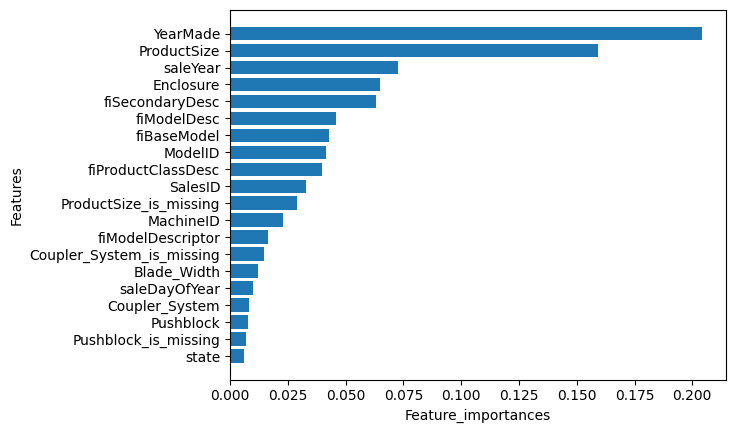

In [100]:
plot_features(x_train.columns, ideal_model.feature_importances_)